**Importing the dependencies**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

**Importing the California Housing Dataset**

In [27]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [28]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [29]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

**Analyzing the dataset**

In [30]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
# add the target (price) column to the DataFrame
house_price_dataframe['Price'] = house_price_dataset.target

In [32]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [34]:
# check for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [35]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Understanding the correlation between various features in the dataset**

<Axes: >

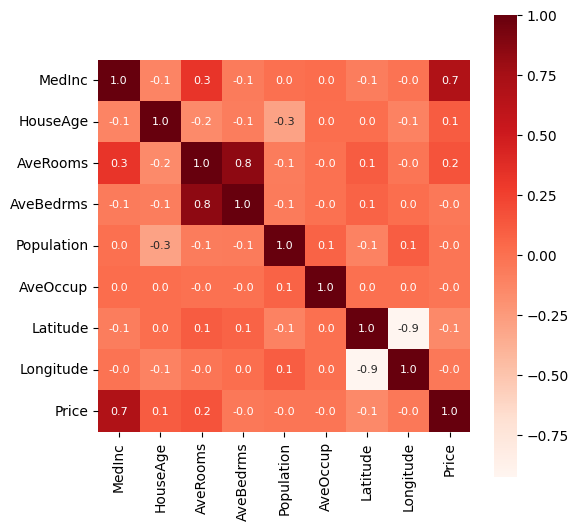

In [36]:
correlation = house_price_dataframe.corr()

# constructing a heatmap to understand the correlation
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar = True, square = True, fmt = '0.1f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

**Splitting the data and Target**

In [37]:
X = house_price_dataframe.drop(columns = 'Price', axis = 1)
Y = house_price_dataframe['Price']

In [38]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [39]:
Y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


**Standardizing X**

In [40]:
scaler = StandardScaler()
scaler.fit(X)
Standardized_X = scaler.transform(X)
Standardized_X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

**Splitting the dataset into test and training data**

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(Standardized_X,Y, test_size = 0.2, random_state = 2)

In [42]:
print(Standardized_X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


**Creating Model**

In [43]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model Evaluation**

Prediction on training data

In [44]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
training_data_prediction

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [45]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print('R squared error: {:0.2f}'.format(score_1))

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean Absolute Error: {:0.2f}'.format(score_2))

R squared error: 0.94
Mean Absolute Error: 0.19


Visualizing the actual Prices and predicted prices

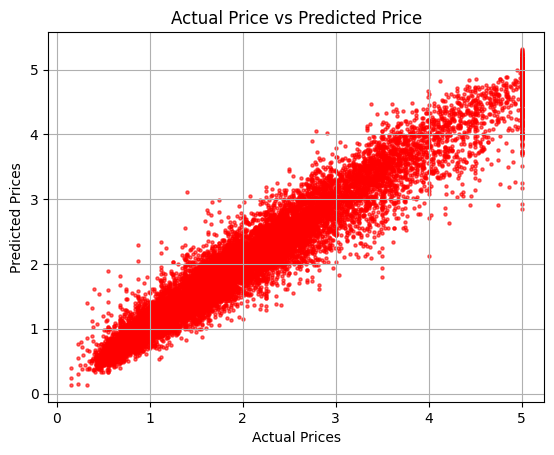

In [46]:
plt.scatter(Y_train, training_data_prediction, s = 5, color = 'red', alpha = 0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.grid(True)
plt.show()

Prediction on test data

In [47]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
test_data_prediction

array([2.8649795 , 1.790346  , 0.92074925, ..., 1.5385513 , 0.92647874,
       2.043316  ], dtype=float32)

In [48]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: {:0.2f}'.format(score_1))

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error: {:0.2f}'.format(score_2))

R squared error: 0.94
Mean Absolute Error: 0.19


Visualizing the actual Prices and predicted prices

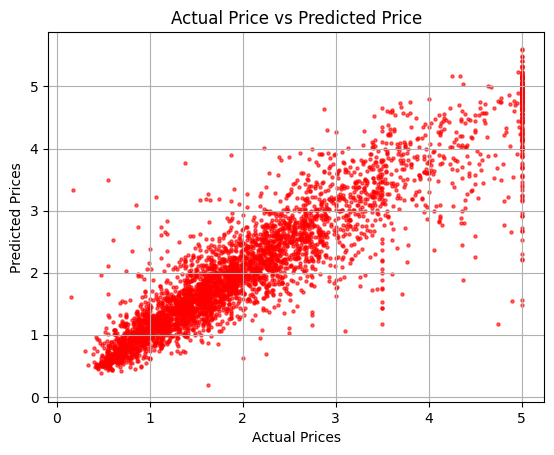

In [49]:
plt.scatter(Y_test, test_data_prediction, s = 5, color = 'red', alpha = 0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.grid(True)
plt.show()